# Unicorn Companies Data Analysis

# 1. Introduction

## 1.1 Background
A unicorn is a privately held starup company with a valuation over $1 billion USD. For a starup, becoming a unicorn would attract more investors and thus get more financial support to grow its business. For an investor, investing unicorns could benefit from high returns if they went IPO or were acquired by big companies. In 2021, stock market experienced a sharp rally after a huge drop in 2020. During this period, more and more unicorns drew investor's attention as they realized these investment opportunities could potentially double their investment. I am interested in investment and always explore the trend in the finacial market. Therefore I chose to do a data analysis of the Unicorn Companies Dataset.

## 1.2 Data Set

This data set includes companies that became unicorns from 2007-2022. 

Variables I used in the data analysis:

- `Company`: Company name
- `Valuation ($B)`: Valuation in billion
- `Date Joined`: Date when companies became unicorns
- `Country`: Country
- `Industry`: Industry
- `Financial Stage`: Financial stage (eg. IPO, Acquired)
- `Investors Count`: Number of Investors

## 1.3 Methods

**1. Import Data**


**2. Data Cleaning and Wrangling**
- Removed symbols in numerical data
- Fixed error in data (eg. misspelling, repeated category due to the mix of upper and lower case)
- Converted data type
- Handled missing data
- Mutate data frame by adding new columns and changing the existing columns for later data analysis.
    

**3. Data Exploration and Visualization** In this section, I displayed the following information either by graphs or tables:
- Number of unicorns joined each year from 2007-2022.
- The industry that has the most unicorns.
- Sum of total raised fund by country from 2007-2022.
- Sum of investor counts by country from 2007-2022.
- Number of unicorns that are IPO or acquired. 


**4. Model Constructing and Prediction:** In this section, I wanted to explore the relationship between `Valuation ($B)` and `Total Raised ($M)`. My hypothesis is that the higher the valuation of an unicorn, the more fund it can raise. I applied a simple linear regression model by using `Valuation ($B)` as the feature variable and `Total Raised ($M)` as the target variable. As a result, I predicted the total raised fund (in million) given the valution (in billion) using this model.

# 2. Import Data

## 2.1 Import Packages

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)

## 2.2 Read Data

In [2]:
# read the csv file
unicorn_raw = pd.read_csv('Unicorn_Companies.csv', parse_dates = ["Date Joined"])
unicorn_raw.head(3)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.30,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1


Source: https://www.kaggle.com/datasets/deepcontractor/unicorn-companies-dataset

In [3]:
# create data frame with selected columns
unicorn_data = unicorn_raw.loc[:, ["Company","Valuation ($B)","Date Joined","Country","Industry",
                                  "Total Raised","Financial Stage","Investors Count"]]
unicorn_data.head(3)

,Company,Valuation ($B),Date Joined,Country,Industry,Total Raised,Financial Stage,Investors Count
0,Bytedance,$140,2017-04-07,China,Artificial intelligence,$7.44B,IPO,28
1,SpaceX,$100.30,2012-12-01,United States,Other,$6.874B,None,29
2,Stripe,$95,2014-01-23,United States,Fintech,$2.901B,Asset,39


In [4]:
unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Company          1037 non-null   object        
 1   Valuation ($B)   1037 non-null   object        
 2   Date Joined      1037 non-null   datetime64[ns]
 3   Country          1037 non-null   object        
 4   Industry         1037 non-null   object        
 5   Total Raised     1037 non-null   object        
 6   Financial Stage  1037 non-null   object        
 7   Investors Count  1037 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 64.9+ KB


# 3. Data Cleaning

First of all, I checked if there is any missing data in the data set and replaced it with either None or 0. Then I removed symbols and converted all non-string column into their correct data type as the following:

- `Valuation ($B)`: convert to float
- `Date Joined`: convert to date when importing
- `Country`: convert to category
- `City`: convert to category
- `Industry`:  convert to category
- `Total Raised`: convert to float
- `Investor Count`: convert to integer

## 3.1 Clean Data

In [5]:
# find out columns with missing data
cols = ["Company","Valuation ($B)","Country","Industry",
        "Total Raised","Financial Stage","Investors Count"]
for col in cols:
    a = unicorn_data[col] == "None"
    if(a.any()):
        print("{} has missing data".format(col))

Total Raised has missing data
Financial Stage has missing data
Investors Count has missing data


For *category data type*, I used `unique()` to check if there is any error with the name of each category and replaced the error with the correct name. For *number data type*, I removed dollar sign and unit to keep just number and converted to either integer or float. For all columns, I replaced the missing data with either `None` or `0`.

### Valuation

In [6]:
#`Valuation ($B)`: convert to float, remove $
unicorn_data['Valuation ($B)'] = unicorn_data['Valuation ($B)'].replace({"\$": ""}, regex=True).astype(float)

### Country

In [7]:
# `Country`: convert to category
unicorn_data["Country"].astype(str).unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Bahamas', 'India', 'Indonesia', 'Germany', 'Hong Kong', 'Mexico',
       'Estonia', 'Canada', 'Turkey', 'South Korea', 'Netherlands',
       'Israel', 'France', 'Finland', 'Colombia', 'Belgium', 'Brazil',
       'Denmark', 'Lithuania', 'Austria', 'Ireland', 'Singapore',
       'Vietnam', 'United Arab Emirates', 'Switzerland', 'Argentina',
       'Spain', 'Japan', 'Luxembourg', 'Nigeria', 'Philippines',
       'Senegal', 'Malaysia', 'Bermuda', 'Norway', 'South Africa',
       'Chile', 'Thailand', 'Czech Republic', 'Croatia', 'Italy'],
      dtype=object)

In [8]:
unicorn_data["Country"] = unicorn_data["Country"].astype("category")

### Industry

In [9]:
# `Industry`: convert to category, fix incorrect spelling
unicorn_data["Industry"].astype(str).unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'E-commerce & direct-to-consumer',
       'Edtech', 'Hardware', 'Consumer & retail', 'Health',
       'Auto & transportation', 'Finttech', 'Cybersecurity',
       'Mobile & telecommunications', 'Travel', 'Artificial Intelligence'],
      dtype=object)

In [10]:
unicorn_data["Industry"] = unicorn_data["Industry"].replace({"Artificial intelligence": "Artificial Intelligence", 
                                                              "Finttech": "Fintech"}).astype("category")

### Financial Stage

In [11]:
# `Financial Stage`: convert to category
unicorn_data["Financial Stage"].astype(str).unique()

array(['IPO', 'None', 'Asset', 'Acquired', 'Acq', 'Divestiture', 'Take',
       'Management', 'Reverse', 'Corporate'], dtype=object)

In [12]:
unicorn_data["Financial Stage"] = unicorn_data["Financial Stage"].replace({"Acq": "Acquired"}).astype("category")

### Investor Count

In [13]:
# `Investor Count`: convert to integer
unicorn_data["Investors Count"] = unicorn_data["Investors Count"].replace({"None": 0}).astype(int)

### Total Raised

In [14]:
# `Total Raised`: convert to float and adjust unit
unicorn_data["Total Raised"] = unicorn_data["Total Raised"].astype(str)
unicorn_data["Total Raised ($M)"] = unicorn_data["Total Raised"].replace({"\$": "", "B$": "", "M$": "","K$": "", 
                                                                         "None": 0}, regex=True).astype(float)
for i, row in unicorn_data.iterrows():
    if "B" in row["Total Raised"]:
        # convert billion to million
        unicorn_data.loc[i, "Total Raised ($M)"] = row["Total Raised ($M)"] * 1000
    elif "K" in row["Total Raised"]:
        # convert thousand to million
        unicorn_data.loc[i, "Total Raised ($M)"] = row["Total Raised ($M)"] / 1000
unicorn_data = unicorn_data.drop("Total Raised", axis=1)

In [15]:
# data frame after data cleaning
unicorn_data.head(3)

,Company,Valuation ($B),Date Joined,Country,Industry,Financial Stage,Investors Count,Total Raised ($M)
0,Bytedance,140.0,2017-04-07,China,Artificial Intelligence,IPO,28,7440.0
1,SpaceX,100.3,2012-12-01,United States,Other,None,29,6874.0
2,Stripe,95.0,2014-01-23,United States,Fintech,Asset,39,2901.0


In [16]:
unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   float64       
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   category      
 4   Industry           1037 non-null   category      
 5   Financial Stage    1037 non-null   category      
 6   Investors Count    1037 non-null   int64         
 7   Total Raised ($M)  1037 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 46.1+ KB


## 3.2 Change DataFrame

To represent the size of companies in a more straighforward way, I mutated the data frame by adding a new column called `Size`. Accroding to investopedia, companies are categorized as Large-Cap, Mid-Cap and Small-Cap based on their market capitalization (`Valuation($B)` in the dataset). Therefore, I classified the size of companies as `Large`, `Medium`, `Small` by their `Valuation($B)`.
- Large-Cap: >10 billion
- Mid-Cap: 2-10 billion
- Small-Cap: < 2 billon

Source:
https://www.investopedia.com/terms/l/large-cap.asp#:~:text=A%20large%2Dcap%20company%20has,%242%20billion%20in%20market%20capitalization.

In [17]:
# mutate data frame by adding a new column
def firm_size(s):
    if s > 10:
        out = "Large"
    elif s > 2:
        out = "Medium"
    else:
        out = "Small"
    return out

unicorn_data["Size"] = unicorn_data["Valuation ($B)"].apply(firm_size)
unicorn_data.head(3)

,Company,Valuation ($B),Date Joined,Country,Industry,Financial Stage,Investors Count,Total Raised ($M),Size
0,Bytedance,140.0,2017-04-07,China,Artificial Intelligence,IPO,28,7440.0,Large
1,SpaceX,100.3,2012-12-01,United States,Other,None,29,6874.0,Large
2,Stripe,95.0,2014-01-23,United States,Fintech,Asset,39,2901.0,Large


I changed the format of `Date Joined` to display year rather than date and renamed the column to `Year Joined`.

In [18]:
# change from date to year
unicorn_data["Date Joined"] = pd.DatetimeIndex(unicorn_data["Date Joined"]).year
unicorn_data.rename(columns = {"Date Joined":"Year Joined"}, inplace = True)

# 4. Data Exploration and Visualization

To observe the trend in the rise of unicorns over time in different countries, I set `Year Joined` and `Country` as index.

In [19]:
# reset index using "Year Joined" and "Country"
unicorn_df = unicorn_data.set_index(["Year Joined", "Country"]).sort_index(ascending = False)
unicorn_df.tail(3)

Company  Valuation ($B)  \
Year Joined Country                                     
2011        United States  Vice Media            5.70   
            Sweden             Klarna           45.60   
2007        France             Veepee            1.38   

                                                  Industry Financial Stage  \
Year Joined Country                                                          
2011        United States     Internet software & services        Acquired   
            Sweden                                 Fintech        Acquired   
2007        France         E-commerce & direct-to-consumer            None   

                           Investors Count  Total Raised ($M)    Size  
Year Joined Country                                                    
2011        United States               14             1555.0  Medium  
            Sweden                      56             3472.0   Large  
2007        France                       5              202.0   Small

## 4.1 Number of Unicorns Joined Each Year

<AxesSubplot:title={'center':'Figure 1: Number of Unicorns'}, ylabel='Year Joined'>

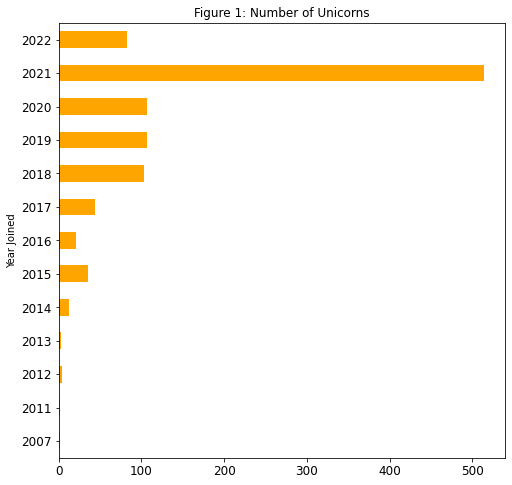

In [20]:
# number of unicorns joined each year from 2007-2022
unicorn_df =  unicorn_data.groupby(["Year Joined"])

unicorn_df["Company"].count().plot(kind = "barh", figsize = (8, 8), 
                                   color = "orange", fontsize = 12,
                                   title = "Figure 1: Number of Unicorns", ylabel = "Count")


From the graph, there was a huge rise of unicorns in 2021. The reason could be that the boom of stock market in 2021 drove the valuation of unicorns.

## 4.2 Number of Unicorns by Industry 

<AxesSubplot:title={'center':'Figure 2: Number of Unicorns by Industry'}>

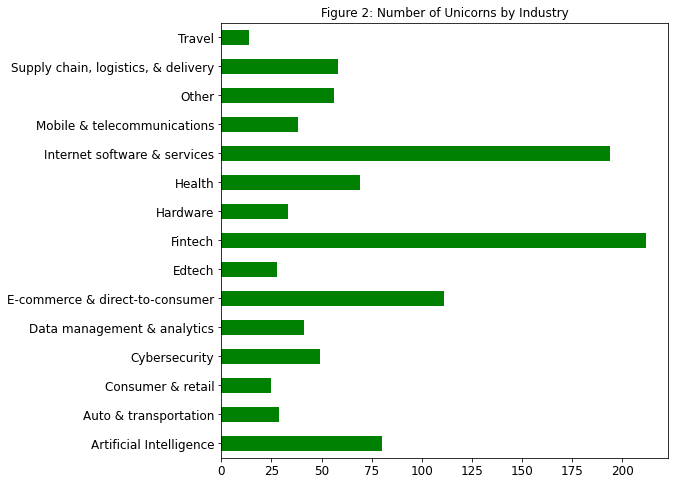

In [21]:
# number of unicorns by industry
unicorn_df =  unicorn_data.groupby(["Industry"])

unicorn_df["Company"].count().plot(kind = "barh", figsize = (8, 8), 
                                   color = "green", fontsize = 12,
                                   title = "Figure 2: Number of Unicorns by Industry", ylabel = "Count", xlabel = "")

Among all the industries, Fintech and Internet Software & Services have the most unicorns. Both industries are related to the technology industry.

## 4.3 Sum of Total Raised Fund by Country


In [22]:
# sum of Total Raised ($M) each year by country 
unicorn_country = unicorn_data.pivot_table(index="Year Joined", columns="Country", values="Total Raised ($M)", 
                                           aggfunc=sum)
unicorn_country.tail(3)

Country,Argentina,Australia,Austria,Bahamas,Belgium,Bermuda,Brazil,Canada,Chile,China,...,South Korea,Spain,Sweden,Switzerland,Thailand,Turkey,United Arab Emirates,United Kingdom,United States,Vietnam
Year Joined,,,,,,,,,,,,,,,,,,,,,
2020,0.0,0.00,0.00,0.0,0.00,0.0,2411.18,479.91,0.00,13764.42,...,100.00,0.00,0.00,0.0,0.0,0.0,279.0,1520.16,36548.98,0.0
2021,608.0,880.71,1182.22,1829.0,319.00,0.0,2210.50,5938.38,395.84,14007.89,...,842.30,1072.00,1715.85,329.9,510.0,1639.2,502.2,5943.33,105354.08,594.7
2022,0.0,0.00,0.00,0.0,235.89,0.0,720.42,853.27,202.50,710.00,...,331.23,408.58,0.00,273.0,0.0,166.2,0.0,1655.06,11836.97,0.0


In [23]:
# top 5 countries that has most Total Raised($M)
unicorn_country_sum = unicorn_country.sum(axis = 0).to_frame(name = "Total Raised ($M)")

unicorn_country_sum = unicorn_country_sum.sort_values("Total Raised ($M)", ascending = False).head(5)

unicorn_country_sum

,Total Raised ($M)
Country,
United States,263732.80
China,120717.36
India,44708.99
United Kingdom,29082.73
Germany,17817.35


<AxesSubplot:title={'center':'Figure 3: Total Raised Fund by Country'}, xlabel='Year Joined', ylabel='Total Raised ($M)'>

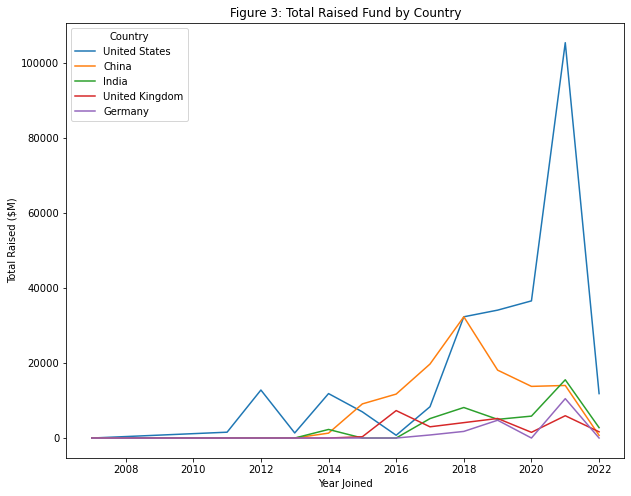

In [24]:
# plot top 5 countries that has most Total Raised($M)
country = ["United States","China","India","United Kingdom","Germany"]

unicorn_country[country].plot(figsize = (10, 8), title = "Figure 3: Total Raised Fund by Country",
                              xlabel='Year Joined', ylabel = "Total Raised ($M)")

From the graph, the top 3 countries that have the most total raised fund are United States, China and India. Unicorns from United States raised significant amount of fund from 2020 to 2021 but experienced a huge drop in 2022. 

## 4.4 Sum of Investors Count by Country
By applying the same method as above, I visualized the top 5 countries with the most investor counts by country and year.

In [25]:
# top 5 countries that have most Investor Counts
unicorn_investors = unicorn_data.pivot_table(index="Year Joined", columns="Country", values="Investors Count", 
                                           aggfunc=sum)

unicorn_investors_sum = unicorn_investors.sum(axis = 0).to_frame(name = "Investors Count")

unicorn_investors_sum = unicorn_investors_sum.sort_values("Investors Count", ascending = False).head(5)
unicorn_investors_sum

,Investors Count
Country,
United States,8035
China,2183
India,1136
United Kingdom,521
Germany,361


<AxesSubplot:title={'center':'Figure 4: Investor Count by Country'}, xlabel='Year Joined', ylabel='Investors Counts'>

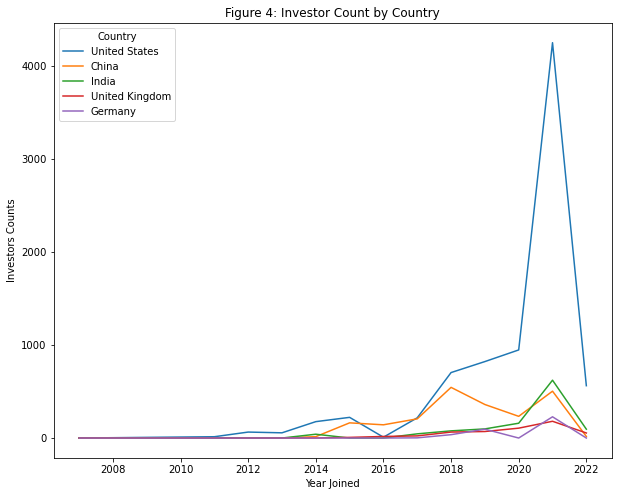

In [26]:
# plot top 5 countries that have most Investor Counts
country = ["United States","China","India","United Kingdom","Germany"]

unicorn_investors[country].plot(figsize = (10, 8), title = "Figure 4: Investor Count by Country", 
                                xlabel='Year Joined', ylabel = "Investors Counts")

From Figure 3 and Figure 4, the top 5 countries that have the most `Total Raised` and `Investor Count` are the same. Among the 5 countries, American unicorns got the most financial support and investors. Overall, there was a spike from 2020 to 2021 and a huge drop from 2021 to 2022. 

## 4.5 Financial Stage of Unicorns

In [27]:
# number of unicorns went IPO
ipo = unicorn_data["Financial Stage"] == "IPO"
num_ipo = unicorn_data["Financial Stage"].loc[ipo].count()

print("Out of {} unicorn companies, {} went IPO".format(len(unicorn_data["Financial Stage"]), num_ipo))

# number of unicorns were acquired
acq = unicorn_data["Financial Stage"] == "Acquired"
num_acq = unicorn_data["Financial Stage"].loc[acq].count()

print("Out of {} unicorn companies, {} got acquired".format(len(unicorn_data["Financial Stage"]), num_acq))

Out of 1037 unicorn companies, 7 went IPO
Out of 1037 unicorn companies, 29 got acquired


# 5. Model Constructing and Prediction

For unicorns, the amount of fund they raise from investors is one of the factors to determine the speed of their growth. Therefore, I wanted to run a regression model to predict the total raised fund given a company's valuation.

Feature Variable: `Valuation ($B)`

Target Variable: `Total Raised ($M)`

## 5.1 Simple Linear Regression

In [28]:
X = unicorn_data
y = unicorn_data["Total Raised ($M)"]

# construct the linear regression model
unicorn_lr_model = linear_model.LinearRegression()

# fit the model
unicorn_lr_model.fit(X[["Valuation ($B)"]], y)

# print the coefficients
beta_0 = unicorn_lr_model.intercept_
beta_1 = unicorn_lr_model.coef_[0]

print(f"Fit model: Total Raised ($M) = {beta_0:.2f} + {beta_1:.2f} Valuation")

Fit model: Total Raised ($M) = 359.66 + 61.60 Valuation


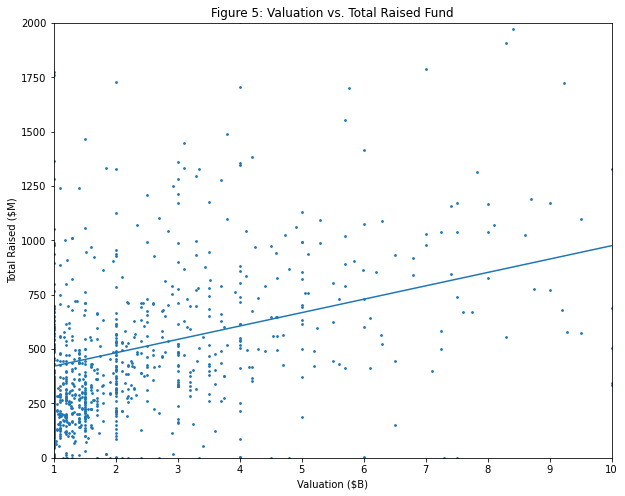

In [29]:
# draw the scatter plot and the optimal linear regression line
def unicorn_scatter(df, ax=None, var="Valuation ($B)"):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 8))
    df.plot.scatter(x=var , y="Total Raised ($M)", s = 3, ax = ax, xlim = (1, 10), ylim = (0,2000), 
                    title = "Figure 5: Valuation vs. Total Raised Fund")
    return ax

ax = unicorn_scatter(X)

# points for the line
x = np.array([0, X["Valuation ($B)"].max()])
ax.plot(x, beta_0 + beta_1*x)

## 5.2 Prediction

In [30]:
# prediction with new observation
new_obs = unicorn_lr_model.predict([[3.0]])[0]

print(f"The model predicts a $3.0 billion unicorn would raise fund for {new_obs:.2f} million dollars")

The model predicts a $3.0 billion unicorn would raise fund for 544.45 million dollars


## 5.3 Model Accuracy

I splitted the dataset to 75% training data and 25 % testing data and computed MSE for both training and testing dataset to assess the model accuracy. 

In [31]:
X = unicorn_data[["Valuation ($B)","Total Raised ($M)"]] 
y = unicorn_data["Total Raised ($M)"]

# split training and testing set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

# compute MSE for traning and test dataset 

def fit_and_report_mses(mod, X_train, X_test, y_train, y_test):
    mod.fit(X_train, y_train)
    return dict(
        mse_train=metrics.mean_squared_error(y_train, mod.predict(X_train)),
        mse_test=metrics.mean_squared_error(y_test, mod.predict(X_test))
    )

print("Linear Regression", fit_and_report_mses(linear_model.LinearRegression(), X_train, X_test, y_train, y_test))


Linear Regression {'mse_train': 2.808093911524468e-27, 'mse_test': 1.2124299459698585e-27}


MSE for both training and testing dataset is low, which shows a high accuracy of this model. There were not many numerical variables in this dataset to perform multi-variable regression. In reality, to more accurately predict the total raised fund by an unicorn, we need more financial data from the company. 

# Summary

In conclusion, the number of unicorns has been increasing from 2007-2022. Among all the industries, Fintech and Internet Software & Services have the most unicorns. And many unicorns are in the technology indutry. From the summary of total raised fund and investor counts by country, United States, China and India has the most unicorns. And this aligns with the rapid economic growth of these three countries. American unicorns are most attractive to investors as they received significantly more investment than any other countries. Surprisingly, out of 1037 unicorn companies, only 7 are IPO, which means most of them remain private. Although IPO doesn't mean they are more successful but it's an effective way for investors to realize their returns. Therefore, this leads to some questions I can further research on: Are unicorns really worth to invest? If so, how to choose the most valuable unicorns?


GitHub Repository: https://github.com/cathylxy/cathylxy-Unicorn-Companies-Data-Analysis.git